# Where in Hong Kong?
### The Restaurateur's Problem

## The Data

Importing the Pandas and Numpy libraries, we read our initial data directly from the URL.

We can then clean up the dataframe by removing unecessary columns, and renaming columns for ease (and also because we're British).

In [1]:
import pandas as pd
import numpy as np

In [2]:
HK = pd.read_html('https://github.com/h2kh/Hong-Kong-neighborhood-clustering/blob/master/coordi.csv')
HK = HK[0]
HK

,Unnamed: 0,Unnamed: 1,Neighborhood,Latitude,Longitude,District,Rent per square foot
0,NaN,0,Kennedy Town,22.282435,114.128417,Central and Western,63
1,NaN,1,Shek Tong Tsui,22.287735,114.134599,Central and Western,62
2,NaN,2,Sai Ying Pun,22.286121,114.142086,Central and Western,69
3,NaN,3,Sheung Wan,22.286870,114.150267,Central and Western,57
4,NaN,4,Central,22.350627,114.184916,Central and Western,62
...,...,...,...,...,...,...,...
123,NaN,123,Peng Chau,22.285544,114.038250,Islands,32
124,NaN,124,Tung Chung,22.286213,113.939913,Islands,27
125,NaN,125,Discovery Bay,22.297369,114.016528,Islands,40
126,NaN,126,Mui Wo,22.264545,114.001306,Islands,27


In [3]:
HK = HK.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
HK.rename(columns={"Neighborhood":"Neighbourhood", "Rent per square foot":"Rent"}, inplace=True)

HK

,Neighbourhood,Latitude,Longitude,District,Rent
0,Kennedy Town,22.282435,114.128417,Central and Western,63
1,Shek Tong Tsui,22.287735,114.134599,Central and Western,62
2,Sai Ying Pun,22.286121,114.142086,Central and Western,69
3,Sheung Wan,22.286870,114.150267,Central and Western,57
4,Central,22.350627,114.184916,Central and Western,62
...,...,...,...,...,...
123,Peng Chau,22.285544,114.038250,Islands,32
124,Tung Chung,22.286213,113.939913,Islands,27
125,Discovery Bay,22.297369,114.016528,Islands,40
126,Mui Wo,22.264545,114.001306,Islands,27


In [4]:
HK['District'].unique()

array(['Central and Western', 'Wan Chai', 'Eastern', 'Southern',
       'Yau Tsim Mong', 'Sham Shui Po', 'Kowloon City', 'Wong Tai Sin',
       'Kwun Tong', 'Kwai Tsing', 'Tsuen Wan', 'Tuen Mun', 'Yuen Long',
       'North', 'Tai Po', 'Sha Tin', 'Sai Kung', 'Islands'], dtype=object)

In [5]:
district = {'District':['Islands', 'Kwai Tsing','North','Sai Kung','Sha Tin','Tai Po','Tsuen Wan','Tuen Mun','Yuen Long','Sham Shui Po','Kowloon City','Kwun Tong','Wong Tai Sin','Yau Tsim Mong','Central and Western','Eastern','Southern','Wan Chai'],
             'Territory':['New Territories','New Territories','New Territories','New Territories','New Territories','New Territories','New Territories','New Territories','New Territories','Kowloon','Kowloon','Kowloon','Kowloon','Kowloon','Hong Kong Island', 'Hong Kong Island', 'Hong Kong Island', 'Hong Kong Island']}

districts = pd.DataFrame(district)
districts

,District,Territory
0,Islands,New Territories
1,Kwai Tsing,New Territories
2,North,New Territories
3,Sai Kung,New Territories
4,Sha Tin,New Territories
5,Tai Po,New Territories
6,Tsuen Wan,New Territories
7,Tuen Mun,New Territories
8,Yuen Long,New Territories
9,Sham Shui Po,Kowloon


In [6]:
HKdata = pd.merge(HK,districts,on='District',how='right')
HKdata = HKdata.reindex(columns=['Territory','District','Neighbourhood','Latitude','Longitude','Rent'])
HKdata

,Territory,District,Neighbourhood,Latitude,Longitude,Rent
0,Hong Kong Island,Central and Western,Kennedy Town,22.282435,114.128417,63
1,Hong Kong Island,Central and Western,Shek Tong Tsui,22.287735,114.134599,62
2,Hong Kong Island,Central and Western,Sai Ying Pun,22.286121,114.142086,69
3,Hong Kong Island,Central and Western,Sheung Wan,22.286870,114.150267,57
4,Hong Kong Island,Central and Western,Central,22.350627,114.184916,62
...,...,...,...,...,...,...
123,New Territories,Islands,Peng Chau,22.285544,114.038250,32
124,New Territories,Islands,Tung Chung,22.286213,113.939913,27
125,New Territories,Islands,Discovery Bay,22.297369,114.016528,40
126,New Territories,Islands,Mui Wo,22.264545,114.001306,27


Reordering the Dataframe so that Territory is the first column, followed by District:

In [7]:
HKdata.dtypes

Territory         object
District          object
Neighbourhood     object
Latitude         float64
Longitude        float64
Rent               int64
dtype: object

In [8]:
HKdata['Rent'] = HKdata['Rent'].astype(np.float64)

In [9]:
HKdata = HKdata.sort_values(by=['Rent'])
HKdata

,Territory,District,Neighbourhood,Latitude,Longitude,Rent
100,New Territories,North,Luk Keng,22.518626,114.215191,20.0
108,New Territories,Tai Po,Kei Ling Ha,22.297180,114.172205,20.0
101,New Territories,North,Wu Kau Tang,22.506676,114.243548,20.0
114,New Territories,Sha Tin,Ma On Shan,22.409046,114.252442,21.0
99,New Territories,North,Sha Tau Kok,22.545633,114.223713,21.0
...,...,...,...,...,...,...
31,Hong Kong Island,Southern,Shek O,22.233167,114.250033,65.0
2,Hong Kong Island,Central and Western,Sai Ying Pun,22.286121,114.142086,69.0
7,Hong Kong Island,Central and Western,Peak,22.272003,114.152417,70.0
32,Kowloon,Yau Tsim Mong,Tsim Sha Tsui,22.297180,114.172205,70.0


## Summary Statistics and Data Visualisation

Focusing on rent only, we can get a good idea of the range of different rent prices throughout Hong Kong. This is even more appropriately depicted through a boxplot of rent prices (HK$ per month) across the 5 different territories of Hong Kong.

Rent prices across different neighbourhoods may present an even better insight, but there are challenges in trying to depict 18 different boxplots on one plot.

In [10]:
print('The dataframe consists of {} territories, {} districts and {} neighbourhoods.'.format(
        len(HKdata['Territory'].unique()),
        len(HKdata['District'].unique()),
        HKdata.shape[0]
    )
)

The dataframe consists of 3 territories, 18 districts and 128 neighbourhoods.


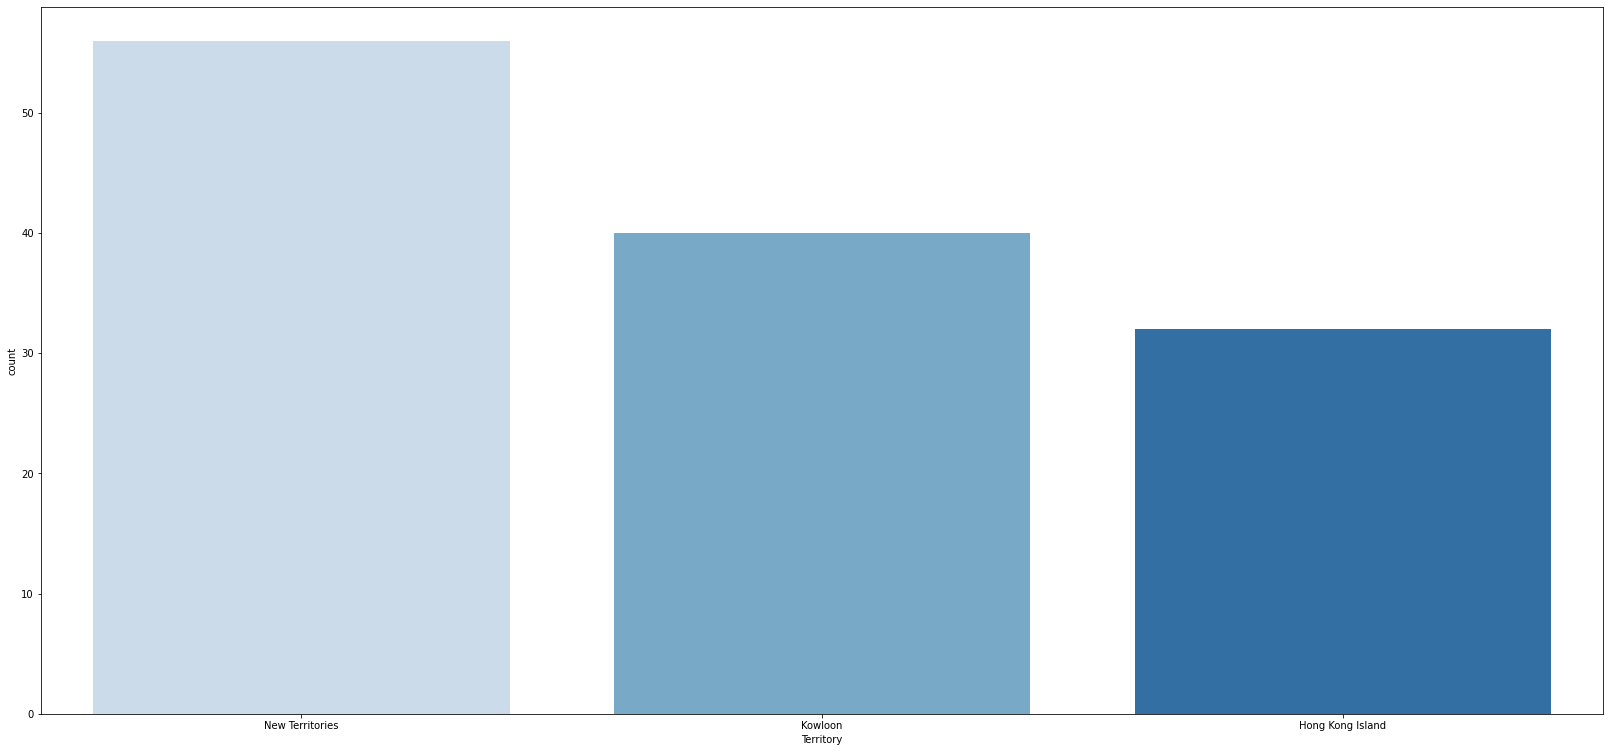

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(28,13))
ax1 = sns.countplot(x="Territory", data=HKdata, palette="Blues")

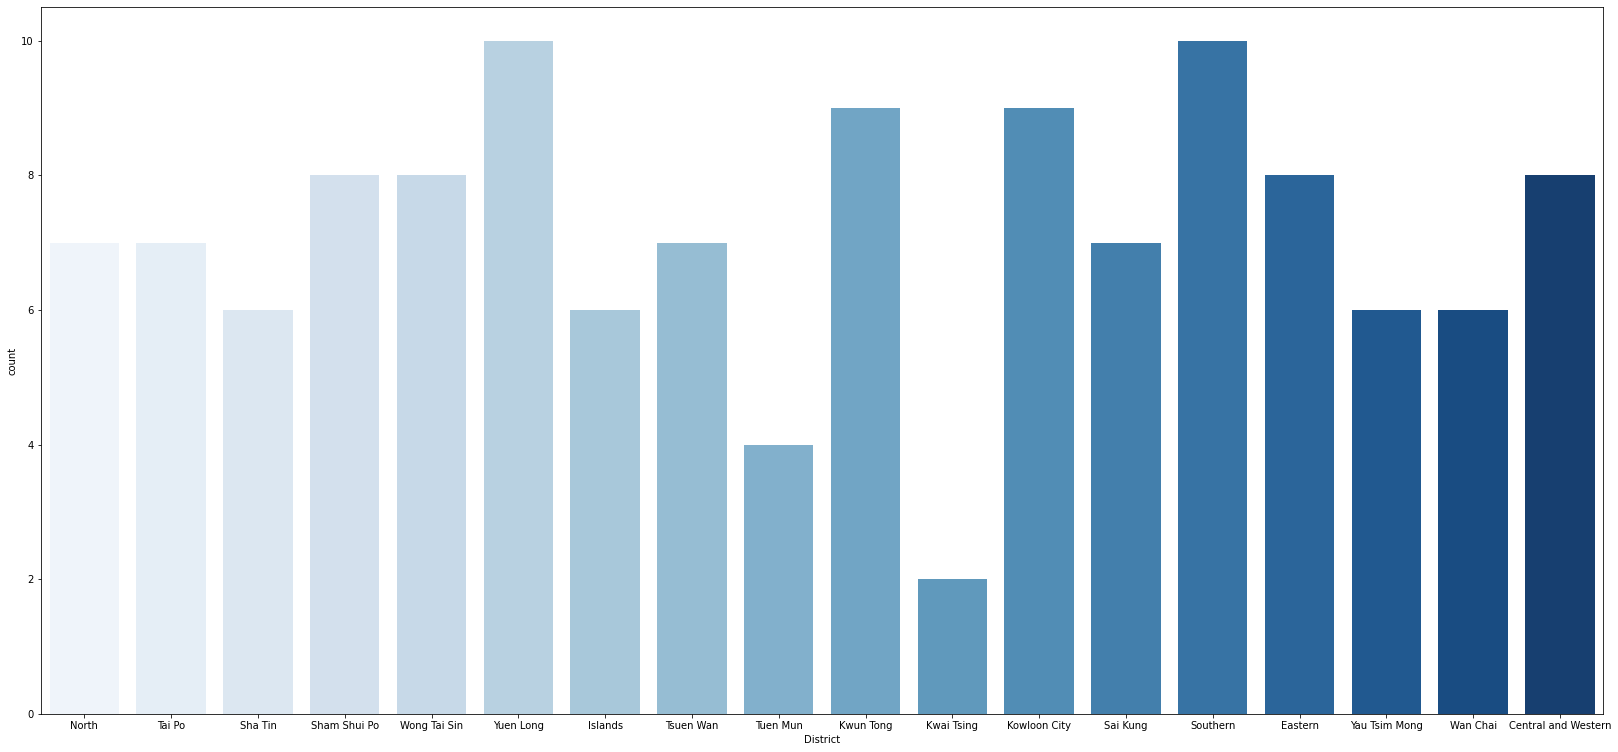

In [12]:
plt.subplots(figsize=(28,13))
ax1 = sns.countplot(x="District", data=HKdata, palette="Blues")

In [13]:
HKdata.describe(include='all').round(0)

,Territory,District,Neighbourhood,Latitude,Longitude,Rent
count,128,128,128,128.0,128.0,128.0
unique,3,18,128,NaN,NaN,NaN
top,New Territories,Yuen Long,Fan Ling,NaN,NaN,NaN
freq,56,10,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,22.0,114.0,41.0
std,NaN,NaN,NaN,0.0,0.0,13.0
min,NaN,NaN,NaN,22.0,114.0,20.0
25%,NaN,NaN,NaN,22.0,114.0,31.0
50%,NaN,NaN,NaN,22.0,114.0,40.0
75%,NaN,NaN,NaN,22.0,114.0,50.0


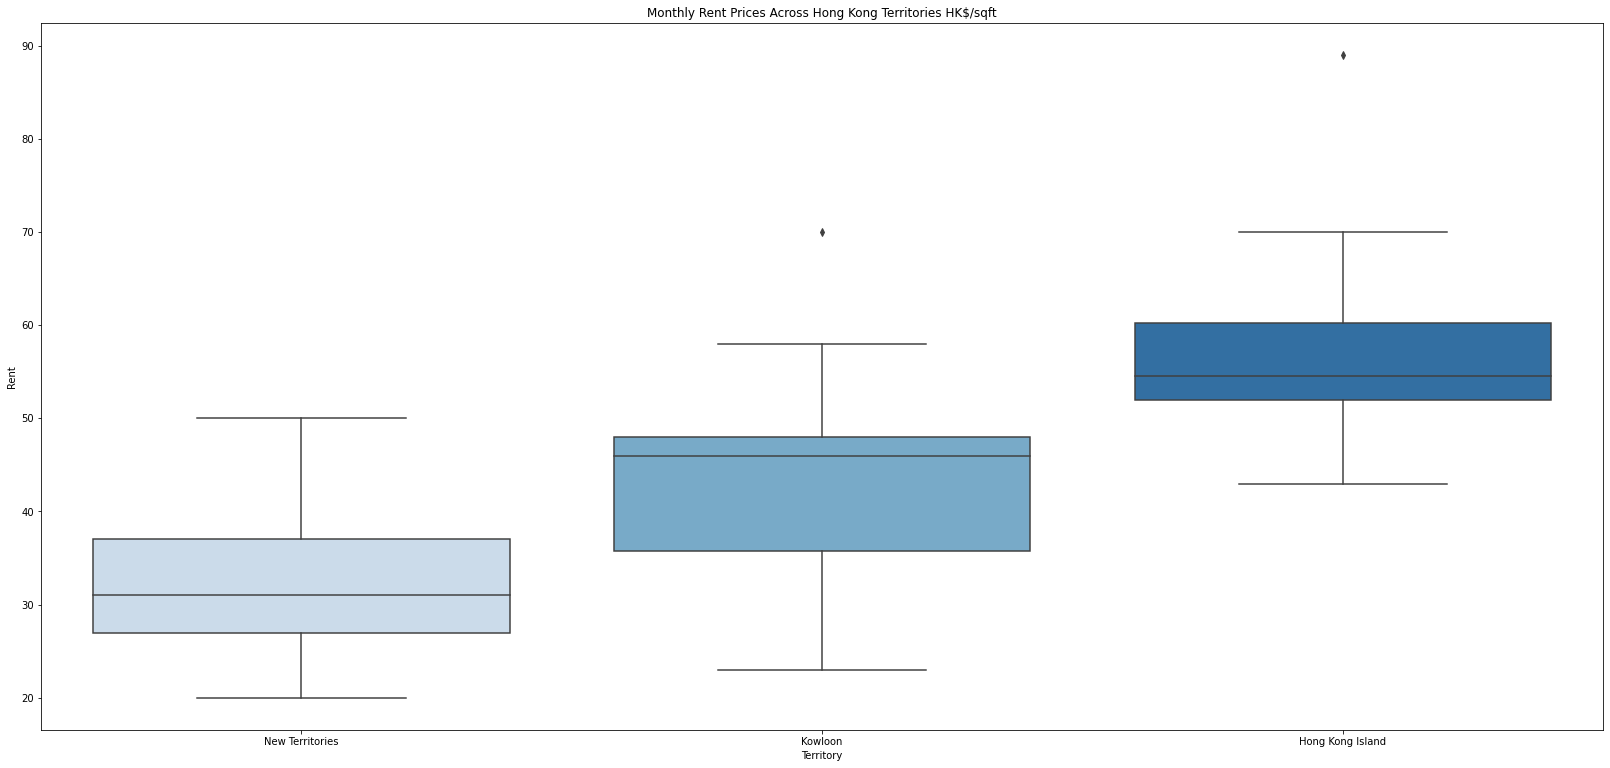

In [14]:
plt.subplots(figsize=(28,13))

plt.xlabel("Territory")
plt.ylabel("Monthly Rent HK$/sqft")
plt.title("Monthly Rent Prices Across Hong Kong Territories HK$/sqft")
ax = sns.boxplot(x="Territory", y="Rent", data=HKdata, palette="Blues")

plt.show()

Next, we want to visualise our geospatial data using Python's Folium library and with assistance from the Nominatim API.

In [15]:
!pip install folium

In [16]:
from geopy.geocoders import Nominatim

import json
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

import requests

print('All requested libraries imported.')

All requested libraries imported.


In [17]:
address = 'Hong Kong'
geolocator = Nominatim(user_agent="HK")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131.


In [18]:
HKmap = folium.Map(location=[latitude, longitude], zoom_start=12)


for lat, lng, terr, dist, neighborhood in zip(HKdata['Latitude'], HKdata['Longitude'], HKdata['Territory'], HKdata['District'], HKdata['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, terr)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#f29191',
        fill_opacity=0.5,).add_to(HKmap)  
    
HKmap

## FourSquare

Now that we know our geospatial data is in working order, we can now extract the second half of the data we need for our investigation. In order to start the FourSquare API, we need our Client ID, Client Secret ID and Access Token.

We then use our credentials to connect to the API, where we can issue a request to obtain data regading venues within a 1250m radius to our neighbourhood locations. Given the size and socio-geographic composition of Hong Kong , it would not be unreasonable to assume each neighbourhood has a radius of approximately 500m.

We limit the number of venues returned to 300, although we would typically expect less.

In [19]:
CLIENT_ID = 'CU530A3DVB0PDELSN0B0UW35OOOV12RP3V4YG45H0S4FGTIV'
CLIENT_SECRET = '3D1SWYSYKNJB5FFK43K5AJ2I2XXKFQHKKLOFUOJIHS4HNOV3'
ACCESS_TOKEN = 'R4IXQGVKDV3MGU20NANAYWTMKIFAXP5POABHOMXXD3GWDRHU' 
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CU530A3DVB0PDELSN0B0UW35OOOV12RP3V4YG45H0S4FGTIV
CLIENT_SECRET:3D1SWYSYKNJB5FFK43K5AJ2I2XXKFQHKKLOFUOJIHS4HNOV3


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


LIMIT = 300
HKvenues = getNearbyVenues(names=HKdata['Neighbourhood'],
                                   latitudes=HKdata['Latitude'],
                                   longitudes=HKdata['Longitude']
                                  )

Luk Keng
Kei Ling Ha
Wu Kau Tang
Ma On Shan
Sha Tau Kok
Fan Ling
Shek Wu Hui
Lai Chi Kok
Mei Foo
Luen Wo Hui
Sheung Shui
Tsz Wan Shan
Ngau Chi Wan
Wu Kai Sha
Pat Heung
Lamma Island
Cheung Muk Tau
Mui Wo
Tung Chung
Tai Mei Tuk
Shuen Wan
Ma Liu Shui
Shek Kong
Tai Po Kau
Lok Ma Chau
Ma Wan
Shek Kip Mei
Sham Shui Po
Cheung Chau
Fo Tan
San Tin
So Kwun Wat
Tai Po
Sunny Bay
Tsing Lung Tau
Ting Kau
Peng Chau
Sha Tin
Tai Lam Chung
Kam Tin
Tai Po Market
Kwun Tong
Lei Muk Shue
Tsing Yi
Tuen Mun
Tai Wo Ping
Kai Tak
Sau Mau Ping
Sham Tseng
Ma Yau Tong
Kwai Chung
Lam Tin
Tsuen Wan
Tai Mong Tsai
Tiu Keng Leng
Lei Yue Mun
Yau Tong
Hang Hau
Ping Shek
Stonecutters Island
Discovery Bay
Tai Wai
Clear Water Bay
Kowloon Bay
Hung Shui Kiu
Tseung Kwan O
Lam Tei
Jordan Valley
Ngau Tau Kok
Sai Kung
Pok Fu Lam
Beacon Hill
Tin Shui Wai
Siu Sai Wan
Ma Tau Kok
Chai Wan
Ho Man Tin
To Kwa Wan
Ma Tau Wai
Yau Yat Tsuen
San Po Kong
Wong Tai Sin
King’s Park
Yau Ma Tei
Lau Fau Shan
Lok Fu
Wang Tau Hom
Kowloon City
Kowloon

Defining a dataframe using the data obtained from the FourSquare API request, we are able to construct the following table:

In [21]:
print(HKvenues.shape)
HKvenues.head()

(3063, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Luk Keng,22.518626,114.215191,BB開心茶座 BB Happy Cafe,22.521218,114.218538,Asian Restaurant
1,Kei Ling Ha,22.297180,114.172205,Hyatt Regency Hong Kong Tsim Sha Tsui (香港尖沙咀凱悅酒店),22.297452,114.173917,Hotel
2,Kei Ling Ha,22.297180,114.172205,The Peninsula Hong Kong (香港半島酒店),22.295102,114.171854,Hotel
3,Kei Ling Ha,22.297180,114.172205,The Peninsula Spa (半島水療中心),22.295448,114.171704,Spa
4,Kei Ling Ha,22.297180,114.172205,Ichiran (一蘭),22.296779,114.173892,Ramen Restaurant


In [22]:
HKvg = HKvenues.groupby('Neighbourhood').count()

HKvg.sort_values(by='Venue')

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
San Tin,1,1,1,1,1,1
Pat Heung,1,1,1,1,1,1
Luk Keng,1,1,1,1,1,1
Jardine’s Lookout,1,1,1,1,1,1
Cheung Muk Tau,1,1,1,1,1,1
...,...,...,...,...,...,...
Admiralty,93,93,93,93,93,93
Tin Hau,100,100,100,100,100,100
Wan Chai,100,100,100,100,100,100


In [23]:
print('There are {} uniques categories.'.format(len(HKvenues['Venue Category'].unique())))

There are 267 uniques categories.


Using one-hot encoding, we are able to create a new dataframe covering all unique venue categories. 

In [24]:
# one hot encoding
HKvenues_onehot = pd.get_dummies(HKvenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HKvenues_onehot['Neighbourhood'] = HKvenues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [HKvenues_onehot.columns[-1]] + list(HKvenues_onehot.columns[:-1])
HKvenues_onehot = HKvenues_onehot[fixed_columns]

HKvenues_onehot.head()

,Neighbourhood,ATM,Accessories Store,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Luk Keng,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kei Ling Ha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kei Ling Ha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kei Ling Ha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kei Ling Ha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
HKvenues_onehot.shape

(3063, 268)

In [26]:
HKvenues_grouped = HKvenues_onehot.groupby('Neighbourhood').sum().reset_index()
HKvenues_grouped

,Neighbourhood,ATM,Accessories Store,Airport Service,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Aberdeen,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Admiralty,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Ap Lei Chau,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beacon Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Braemar Hill,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Wu Kau Tang,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
120,Yau Ma Tei,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
121,Yau Tong,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,Yau Yat Tsuen,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Given that the primary focus of this investigation involves restaurants within Hong Kong, the category types we are most interested in are...restaurants.

Using a substring search (please note limitations to this approach do exist and are explained in the report), we can group together all restaurants. As we have noticed 'Noodle House' being in its own category, we can include this too.

In [27]:
restaurant = HKvenues_grouped.columns[HKvenues_grouped.columns.str.contains(pat = 'Restaurant')] 
restaurant.tolist()

['American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Balinese Restaurant',
 'Beijing Restaurant',
 'Belgian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Dim Sum Restaurant',
 'Donburi Restaurant',
 'Dongbei Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'English Restaurant',
 'Fast Food Restaurant',
 'French Restaurant',
 'Fujian Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Hainan Restaurant',
 'Hakka Restaurant',
 'Halal Restaurant',
 'Hong Kong Restaurant',
 'Hotpot Restaurant',
 'Hunan Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
 'Korean BBQ Restaurant',
 'Korean Restaurant',
 'Lebanese Restaurant',
 'Macanese Restaurant',
 'Malay Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaur

In [28]:
total_restaurants = HKvenues_grouped['American Restaurant']+\
HKvenues_grouped[ 'Arepa Restaurant']+\
HKvenues_grouped[ 'Argentinian Restaurant']+\
HKvenues_grouped[ 'Asian Restaurant']+\
HKvenues_grouped[ 'Australian Restaurant']+\
HKvenues_grouped[ 'Balinese Restaurant']+\
HKvenues_grouped[ 'Beijing Restaurant']+\
HKvenues_grouped[ 'Belgian Restaurant']+\
HKvenues_grouped[ 'Cantonese Restaurant']+\
HKvenues_grouped[ 'Caribbean Restaurant']+\
HKvenues_grouped[ 'Chinese Restaurant']+\
HKvenues_grouped[ 'Comfort Food Restaurant']+\
HKvenues_grouped[ 'Dim Sum Restaurant']+\
HKvenues_grouped[ 'Donburi Restaurant']+\
HKvenues_grouped[ 'Dongbei Restaurant']+\
HKvenues_grouped[ 'Dumpling Restaurant']+\
HKvenues_grouped[ 'Eastern European Restaurant']+\
HKvenues_grouped[ 'English Restaurant']+\
HKvenues_grouped[ 'Fast Food Restaurant']+\
HKvenues_grouped[ 'French Restaurant']+\
HKvenues_grouped[ 'Fujian Restaurant']+\
HKvenues_grouped[ 'German Restaurant']+\
HKvenues_grouped[ 'Greek Restaurant']+\
HKvenues_grouped[ 'Hainan Restaurant']+\
HKvenues_grouped[ 'Hakka Restaurant']+\
HKvenues_grouped[ 'Halal Restaurant']+\
HKvenues_grouped[ 'Hong Kong Restaurant']+\
HKvenues_grouped[ 'Hotpot Restaurant']+\
HKvenues_grouped[ 'Hunan Restaurant']+\
HKvenues_grouped[ 'Indian Restaurant']+\
HKvenues_grouped[ 'Indonesian Restaurant']+\
HKvenues_grouped[ 'Italian Restaurant']+\
HKvenues_grouped[ 'Japanese Curry Restaurant']+\
HKvenues_grouped[ 'Japanese Restaurant']+\
HKvenues_grouped[ 'Korean BBQ Restaurant']+\
HKvenues_grouped[ 'Korean Restaurant']+\
HKvenues_grouped[ 'Lebanese Restaurant']+\
HKvenues_grouped[ 'Macanese Restaurant']+\
HKvenues_grouped[ 'Malay Restaurant']+\
HKvenues_grouped[ 'Mediterranean Restaurant']+\
HKvenues_grouped[ 'Mexican Restaurant']+\
HKvenues_grouped[ 'Middle Eastern Restaurant']+\
HKvenues_grouped[ 'Modern European Restaurant']+\
HKvenues_grouped[ 'Molecular Gastronomy Restaurant']+\
HKvenues_grouped[ 'New American Restaurant']+\
HKvenues_grouped[ 'Pakistani Restaurant']+\
HKvenues_grouped[ 'Peking Duck Restaurant']+\
HKvenues_grouped[ 'Peruvian Restaurant']+\
HKvenues_grouped[ 'Ramen Restaurant']+\
HKvenues_grouped[ 'Restaurant']+\
HKvenues_grouped[ 'Satay Restaurant']+\
HKvenues_grouped[ 'Scandinavian Restaurant']+\
HKvenues_grouped[ 'Seafood Restaurant']+\
HKvenues_grouped[ 'Shaanxi Restaurant']+\
HKvenues_grouped[ 'Shabu-Shabu Restaurant']+\
HKvenues_grouped[ 'Shanghai Restaurant']+\
HKvenues_grouped[ 'Soba Restaurant']+\
HKvenues_grouped[ 'South Indian Restaurant']+\
HKvenues_grouped[ 'Spanish Restaurant']+\
HKvenues_grouped[ 'Sri Lankan Restaurant']+\
HKvenues_grouped[ 'Sushi Restaurant']+\
HKvenues_grouped[ 'Swiss Restaurant']+\
HKvenues_grouped[ 'Szechuan Restaurant']+\
HKvenues_grouped[ 'Taiwanese Restaurant']+\
HKvenues_grouped[ 'Tapas Restaurant']+\
HKvenues_grouped[ 'Thai Restaurant']+\
HKvenues_grouped[ 'Turkish Restaurant']+\
HKvenues_grouped[ 'Udon Restaurant']+\
HKvenues_grouped[ 'Vegetarian / Vegan Restaurant']+\
HKvenues_grouped[ 'Vietnamese Restaurant']+\
HKvenues_grouped[ 'Yunnan Restaurant']+\
HKvenues_grouped[ 'Zhejiang Restaurant']+\
HKvenues_grouped[ 'Noodle House']

We will use this investigation to determine where in Hong Kong a restauranteur should open a new pan-Asian restaurant. Therefore, we will need to identify which restaurant categories fall under 'Asian', and use this to build the total number of Asian restaurants. Please note for the purpose of this exercise, pan-Asian refers to the cuisines of China, Japan, the Korean Peninsula and Taiwan.

In [29]:
total_asian_restaurants = HKvenues_grouped[ 'Asian Restaurant']+\
HKvenues_grouped[ 'Beijing Restaurant']+\
HKvenues_grouped[ 'Cantonese Restaurant']+\
HKvenues_grouped[ 'Chinese Restaurant']+\
HKvenues_grouped[ 'Dim Sum Restaurant']+\
HKvenues_grouped[ 'Donburi Restaurant']+\
HKvenues_grouped[ 'Dongbei Restaurant']+\
HKvenues_grouped[ 'Dumpling Restaurant']+\
HKvenues_grouped[ 'Fujian Restaurant']+\
HKvenues_grouped[ 'Hainan Restaurant']+\
HKvenues_grouped[ 'Hakka Restaurant']+\
HKvenues_grouped[ 'Hong Kong Restaurant']+\
HKvenues_grouped[ 'Hotpot Restaurant']+\
HKvenues_grouped[ 'Hunan Restaurant']+\
HKvenues_grouped[ 'Japanese Curry Restaurant']+\
HKvenues_grouped[ 'Japanese Restaurant']+\
HKvenues_grouped[ 'Korean BBQ Restaurant']+\
HKvenues_grouped[ 'Korean Restaurant']+\
HKvenues_grouped[ 'Macanese Restaurant']+\
HKvenues_grouped[ 'Peking Duck Restaurant']+\
HKvenues_grouped[ 'Ramen Restaurant']+\
HKvenues_grouped[ 'Shaanxi Restaurant']+\
HKvenues_grouped[ 'Shabu-Shabu Restaurant']+\
HKvenues_grouped[ 'Shanghai Restaurant']+\
HKvenues_grouped[ 'Soba Restaurant']+\
HKvenues_grouped[ 'Sushi Restaurant']+\
HKvenues_grouped[ 'Szechuan Restaurant']+\
HKvenues_grouped[ 'Taiwanese Restaurant']+\
HKvenues_grouped[ 'Udon Restaurant']+\
HKvenues_grouped[ 'Yunnan Restaurant']+\
HKvenues_grouped[ 'Zhejiang Restaurant']+\
HKvenues_grouped['Noodle House']

Grouping the results, and merging with our initial dataframe, we now have a new dataframe consisting of total restaurants and Asian restaurants, in addition to our initial datapoints.

We also look to add a new statistic which displays the proportion of Asian restaurants in a given neighbourhood against the total number of restaurants. As values divided by 0 are displayed as NaN, we will have to ensure NaNs are replaced by 0.

In [30]:
HKrestaurants = pd.DataFrame(data={'Neighbourhood': HKvenues_grouped['Neighbourhood'],'Total Restaurants':total_restaurants, 'Asian Restaurants': total_asian_restaurants})
HKrestaurants['%Asian'] = (HKrestaurants['Asian Restaurants']/HKrestaurants['Total Restaurants']).round(2)
HKrestaurants['%Asian'] = HKrestaurants['%Asian'].replace(np.nan, 0)

In [31]:
HongKong = pd.merge(HKdata,HKrestaurants,on='Neighbourhood')
HongKong

,Territory,District,Neighbourhood,Latitude,Longitude,Rent,Total Restaurants,Asian Restaurants,%Asian
0,New Territories,North,Luk Keng,22.518626,114.215191,20.0,1,1,1.00
1,New Territories,Tai Po,Kei Ling Ha,22.297180,114.172205,20.0,32,21,0.66
2,New Territories,North,Wu Kau Tang,22.506676,114.243548,20.0,0,0,0.00
3,New Territories,North,Sha Tau Kok,22.545633,114.223713,21.0,1,1,1.00
4,New Territories,North,Fan Ling,22.492078,114.138707,22.0,9,5,0.56
...,...,...,...,...,...,...,...,...,...
119,Hong Kong Island,Southern,Shek O,22.233167,114.250033,65.0,7,1,0.14
120,Hong Kong Island,Central and Western,Sai Ying Pun,22.286121,114.142086,69.0,27,12,0.44
121,Hong Kong Island,Central and Western,Peak,22.272003,114.152417,70.0,9,3,0.33
122,Kowloon,Yau Tsim Mong,Tsim Sha Tsui,22.297180,114.172205,70.0,32,21,0.66


In [32]:
print('The FourSquare API returned a total of {} restaurants, of which {} are Asian restaurants. \n\
On average, Asian restaurants account for {}% of Hong Kong restaurants.'
      .format(HongKong['Total Restaurants'].sum(), HongKong['Asian Restaurants'].sum(), ((HongKong['Asian Restaurants'].sum()/HongKong['Total Restaurants'].sum())*100).round(2)))

The FourSquare API returned a total of 1356 restaurants, of which 847 are Asian restaurants. 
On average, Asian restaurants account for 62.46% of Hong Kong restaurants.


## K-Means Clustering

In order to build to run the K-Means clustering model, we first have to drop datapoints we are not taking into consideration. As we are clustering on the total number of restaurants, proportion of Asian restaurants and rent prices within the neighbourhoods of Hong Kong, we can look to drop all other variables from our dataframe, and create a new dataframe for the model.

In [33]:
HongKong2 = HongKong.drop(['Territory', 'District', 'Longitude', 'Latitude', 'Asian Restaurants'], axis=1)
HongKong2

,Neighbourhood,Rent,Total Restaurants,%Asian
0,Luk Keng,20.0,1,1.00
1,Kei Ling Ha,20.0,32,0.66
2,Wu Kau Tang,20.0,0,0.00
3,Sha Tau Kok,21.0,1,1.00
4,Fan Ling,22.0,9,0.56
...,...,...,...,...
119,Shek O,65.0,7,0.14
120,Sai Ying Pun,69.0,27,0.44
121,Peak,70.0,9,0.33
122,Tsim Sha Tsui,70.0,32,0.66


Using the Elbow Method, we determine the optimal k Clusters to be 6 (athough a strong argument could be presented for k=4)

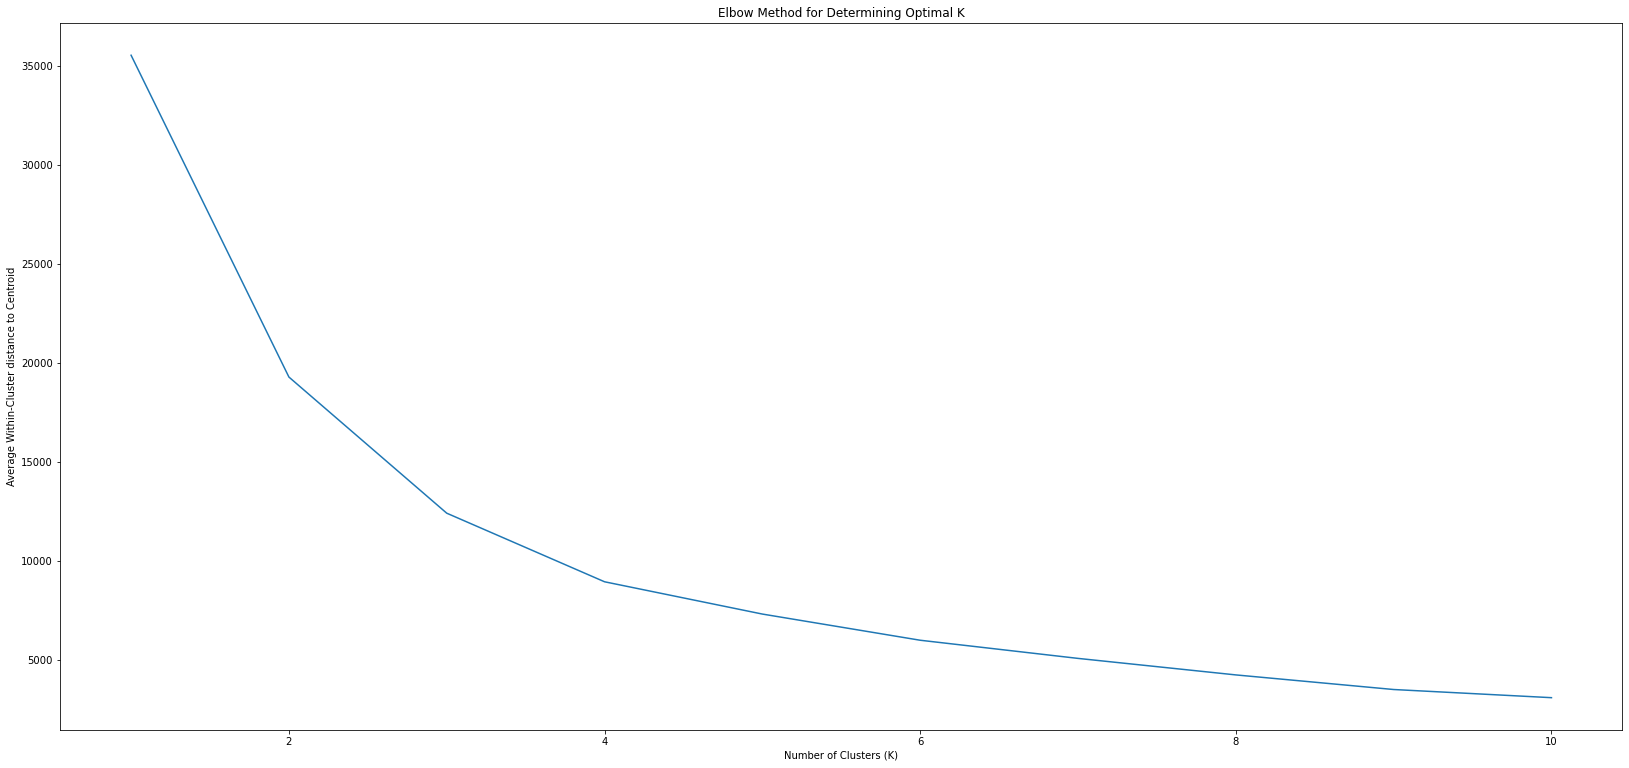

In [34]:
HKcluster = HongKong2.drop('Neighbourhood', 1)

X=HKcluster

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 1000, n_init= 100, random_state= 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(28,13))
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method for Determining Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Within-Cluster distance to Centroid')  
plt.show()



In [35]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HKcluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [36]:
HongKong2.insert(0, 'Cluster', kmeans.labels_)
HongKong2

,Cluster,Neighbourhood,Rent,Total Restaurants,%Asian
0,3,Luk Keng,20.0,1,1.00
1,1,Kei Ling Ha,20.0,32,0.66
2,3,Wu Kau Tang,20.0,0,0.00
3,3,Sha Tau Kok,21.0,1,1.00
4,3,Fan Ling,22.0,9,0.56
...,...,...,...,...,...
119,5,Shek O,65.0,7,0.14
120,4,Sai Ying Pun,69.0,27,0.44
121,5,Peak,70.0,9,0.33
122,4,Tsim Sha Tsui,70.0,32,0.66


Adding the dropped variables back into our dataframe using the merge function:

In [37]:
HK_merged = HongKong.loc[:,'Territory':'Longitude']
HK_merged['Asian Restaurants'] = HongKong['Asian Restaurants']
HK_merged

,Territory,District,Neighbourhood,Latitude,Longitude,Asian Restaurants
0,New Territories,North,Luk Keng,22.518626,114.215191,1
1,New Territories,Tai Po,Kei Ling Ha,22.297180,114.172205,21
2,New Territories,North,Wu Kau Tang,22.506676,114.243548,0
3,New Territories,North,Sha Tau Kok,22.545633,114.223713,1
4,New Territories,North,Fan Ling,22.492078,114.138707,5
...,...,...,...,...,...,...
119,Hong Kong Island,Southern,Shek O,22.233167,114.250033,1
120,Hong Kong Island,Central and Western,Sai Ying Pun,22.286121,114.142086,12
121,Hong Kong Island,Central and Western,Peak,22.272003,114.152417,3
122,Kowloon,Yau Tsim Mong,Tsim Sha Tsui,22.297180,114.172205,21


We also re-number our clusters 1-6 as opposed to 0-5, as it easier to follow

In [38]:
HK_merged = HK_merged.join(HongKong2.set_index('Neighbourhood'), on='Neighbourhood')
HK_merged['Cluster'] = HK_merged['Cluster']+1
HK_merged

,Territory,District,Neighbourhood,Latitude,Longitude,Asian Restaurants,Cluster,Rent,Total Restaurants,%Asian
0,New Territories,North,Luk Keng,22.518626,114.215191,1,4,20.0,1,1.00
1,New Territories,Tai Po,Kei Ling Ha,22.297180,114.172205,21,2,20.0,32,0.66
2,New Territories,North,Wu Kau Tang,22.506676,114.243548,0,4,20.0,0,0.00
3,New Territories,North,Sha Tau Kok,22.545633,114.223713,1,4,21.0,1,1.00
4,New Territories,North,Fan Ling,22.492078,114.138707,5,4,22.0,9,0.56
...,...,...,...,...,...,...,...,...,...,...
119,Hong Kong Island,Southern,Shek O,22.233167,114.250033,1,6,65.0,7,0.14
120,Hong Kong Island,Central and Western,Sai Ying Pun,22.286121,114.142086,12,5,69.0,27,0.44
121,Hong Kong Island,Central and Western,Peak,22.272003,114.152417,3,6,70.0,9,0.33
122,Kowloon,Yau Tsim Mong,Tsim Sha Tsui,22.297180,114.172205,21,5,70.0,32,0.66


We re-order the columns of our dataframe as this will be useful later when we want to display our individual Cluster tables.

In [39]:
HK_merged = HK_merged.reindex(columns=['Territory','District','Neighbourhood','Cluster','Latitude','Longitude','Rent','Total Restaurants','Asian Restaurants', '%Asian'])
HK_merged

,Territory,District,Neighbourhood,Cluster,Latitude,Longitude,Rent,Total Restaurants,Asian Restaurants,%Asian
0,New Territories,North,Luk Keng,4,22.518626,114.215191,20.0,1,1,1.00
1,New Territories,Tai Po,Kei Ling Ha,2,22.297180,114.172205,20.0,32,21,0.66
2,New Territories,North,Wu Kau Tang,4,22.506676,114.243548,20.0,0,0,0.00
3,New Territories,North,Sha Tau Kok,4,22.545633,114.223713,21.0,1,1,1.00
4,New Territories,North,Fan Ling,4,22.492078,114.138707,22.0,9,5,0.56
...,...,...,...,...,...,...,...,...,...,...
119,Hong Kong Island,Southern,Shek O,6,22.233167,114.250033,65.0,7,1,0.14
120,Hong Kong Island,Central and Western,Sai Ying Pun,5,22.286121,114.142086,69.0,27,12,0.44
121,Hong Kong Island,Central and Western,Peak,6,22.272003,114.152417,70.0,9,3,0.33
122,Kowloon,Yau Tsim Mong,Tsim Sha Tsui,5,22.297180,114.172205,70.0,32,21,0.66


In [40]:
HK_merged.dtypes

Territory             object
District              object
Neighbourhood         object
Cluster                int32
Latitude             float64
Longitude            float64
Rent                 float64
Total Restaurants      uint8
Asian Restaurants      uint8
%Asian               float64
dtype: object

## The Map

Using K-Means clustering, we have managed to define our dataset by four unique clusters. We can use Folium to visualise our clusters on a map of Hong Kong.

Our clusters are represented by the following colours:

1. Cluster 1 - Purple
2. Cluster 2 - Blue
3. Cluster 3 - Teal
4. Cluster 4 - Green
5. Cluster 5 - Orange
6. Cluster 6 - Red

In [41]:
# create map
HKcluster_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, asian, rent in zip(HK_merged['Latitude'], HK_merged['Longitude'], HK_merged['Neighbourhood'], HK_merged['Cluster'], HK_merged['%Asian'], HK_merged['Rent']):
    label = folium.Popup(str(poi) + '\nCluster: ' + str(cluster) + '\n%Asian: ' + str(asian) + '\nRent: ' + str(rent), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(HKcluster_map)
       
HKcluster_map

## Data Clusters

Looking at the results generated by the K-Means model, we can see a difinitive pattern amongst the 6 clusters:

#### Cluster 1

Cluster 1 contains a moderately large number of restaurants per neighbourhood, with a significant proportion of Asian restaurants (64.38%). The rent prices in Cluster 1 are also high, with an average of HK$53.08.

In [42]:
Cluster1 = HK_merged.loc[HK_merged['Cluster'] == 1, HK_merged.columns[[0,1,2] + list(range(6, HK_merged.shape[1]))]]
Cluster1

,Territory,District,Neighbourhood,Rent,Total Restaurants,Asian Restaurants,%Asian
85,Kowloon,Kowloon City,Kowloon City,48.0,33,15,0.45
92,Kowloon,Yau Tsim Mong,Tai Kok Tsui,50.0,39,24,0.62
93,New Territories,Yuen Long,Yuen Long,50.0,23,16,0.70
96,Kowloon,Yau Tsim Mong,Mong Kok,52.0,28,21,0.75
98,Hong Kong Island,Eastern,Quarry Bay,52.0,25,18,0.72
99,Hong Kong Island,Eastern,Shau Kei Wan,53.0,17,12,0.71
101,Hong Kong Island,Wan Chai,Causeway Bay,54.0,28,22,0.79
102,Hong Kong Island,Wan Chai,Happy Valley,54.0,24,18,0.75
105,Hong Kong Island,Wan Chai,So Kon Po,54.0,17,11,0.65
107,Hong Kong Island,Central and Western,Mid-levels,55.0,20,5,0.25


In [54]:
print('There are a total number of {} restauarants and {} Asian Restuarants across {} neighbourhoods in Cluster 1. \n\
On average there are {} restaurants per neighbourhood in Cluster 1. \n\
The proportion of Asian restaurants to total restaurants within Cluster 1 is {}%. \n\
The average monthly rent per square foot in Cluster 1 is HK${}.'.format(
        
      Cluster1['Total Restaurants'].sum(),
        Cluster1['Asian Restaurants'].sum(),
        len(Cluster1['Neighbourhood'].unique()),
        (Cluster1['Total Restaurants'].sum()/len(Cluster1['Neighbourhood'])).round(2),
        (((Cluster1['Asian Restaurants'].sum())/Cluster1['Total Restaurants'].sum())*100).round(2),
        (Cluster1['Rent'].sum()/len(Cluster1['Neighbourhood'])).round(2)
    )
)

There are a total number of 306 restauarants and 197 Asian Restuarants across 12 neighbourhoods in Cluster 1. 
On average there are 25.5 restaurants per neighbourhood in Cluster 1. 
The proportion of Asian restaurants to total restaurants within Cluster 1 is 64.38%. 
The average monthly rent per square foot in Cluster 1 is HK$53.08.


#### Cluster 2

Asian restaurants account for 65.09% of all restaurants within Cluster 2. The average rent within Cluster 2 is below the Hong Kong average at HK$33.20. On average there are 21.2 restaurants per neighbourhood within Cluster 2.

In [44]:
Cluster2 = pd.DataFrame(HK_merged.loc[HK_merged['Cluster'] == 2, HK_merged.columns[[0,1,2] + list(range(6, HK_merged.shape[1]))]])
Cluster2

,Territory,District,Neighbourhood,Rent,Total Restaurants,Asian Restaurants,%Asian
1,New Territories,Tai Po,Kei Ling Ha,20.0,32,21,0.66
17,New Territories,Islands,Tung Chung,27.0,19,12,0.63
25,Kowloon,Sham Shui Po,Shek Kip Mei,30.0,20,18,0.90
26,Kowloon,Sham Shui Po,Sham Shui Po,30.0,24,19,0.79
27,New Territories,Islands,Cheung Chau,30.0,13,5,0.38
31,New Territories,Tai Po,Tai Po,31.0,20,16,0.80
36,New Territories,Sha Tin,Sha Tin,32.0,27,19,0.70
40,Kowloon,Kwun Tong,Kwun Tong,33.0,25,17,0.68
42,New Territories,Kwai Tsing,Tsing Yi,34.0,14,11,0.79
47,New Territories,Tsuen Wan,Sham Tseng,35.0,17,12,0.71


In [55]:
print('There are a total number of {} restauarants and {} Asian Restuarants across {} neighbourhoods in Cluster 2. \n\
On average there are {} restaurants per neighbourhood in Cluster 2. \n\
The proportion of Asian restaurants to total restaurants within Cluster 2 is {}%. \n\
The average monthly rent per square foot in Cluster 2 is HK${}.'.format(
    
        Cluster2['Total Restaurants'].sum(),
        Cluster2['Asian Restaurants'].sum(),
        len(Cluster2['Neighbourhood'].unique()),
        (Cluster2['Total Restaurants'].sum()/len(Cluster2['Neighbourhood'])).round(2),
        (((Cluster2['Asian Restaurants'].sum())/Cluster2['Total Restaurants'].sum())*100).round(2),
        (Cluster2['Rent'].sum()/len(Cluster2['Neighbourhood'])).round(2)
    )
)

There are a total number of 318 restauarants and 207 Asian Restuarants across 15 neighbourhoods in Cluster 2. 
On average there are 21.2 restaurants per neighbourhood in Cluster 2. 
The proportion of Asian restaurants to total restaurants within Cluster 2 is 65.09%. 
The average monthly rent per square foot in Cluster 2 is HK$33.2.


#### Cluster 3

Cluster 3 consists of a low average number of restaurants per neighbourhood (7.67). However, Asian restaurants account for almost 64% of the total restaurant population within the cluster. The average rent within the cluster is higher than the Hong Kong average at HK$45.06.

In [46]:
Cluster3 = pd.DataFrame(HK_merged.loc[HK_merged['Cluster'] == 3, HK_merged.columns[[0,1,2] + list(range(6, HK_merged.shape[1]))]])
Cluster3

,Territory,District,Neighbourhood,Rent,Total Restaurants,Asian Restaurants,%Asian
53,New Territories,Sai Kung,Tiu Keng Leng,38.0,6,3,0.50
55,Kowloon,Kwun Tong,Yau Tong,39.0,10,7,0.70
57,Kowloon,Kwun Tong,Ping Shek,39.0,4,3,0.75
58,New Territories,Islands,Discovery Bay,40.0,9,2,0.22
59,New Territories,Sha Tin,Tai Wai,40.0,14,12,0.86
60,New Territories,Sai Kung,Clear Water Bay,40.0,6,5,0.83
62,New Territories,Yuen Long,Hung Shui Kiu,41.0,2,1,0.50
63,New Territories,Sai Kung,Tseung Kwan O,41.0,16,11,0.69
64,New Territories,Tuen Mun,Lam Tei,41.0,6,4,0.67
65,Kowloon,Kwun Tong,Jordan Valley,41.0,4,1,0.25


In [56]:
print('There are a total number of {} restauarants and {} Asian Restuarants across {} neighbourhoods in Cluster 3. \n\
On average there are {} restaurants per neighbourhood in Cluster 3. \n\
The proportion of Asian restaurants to total restaurants within Cluster 3 is {}%. \n\
The average monthly rent per square foot in Cluster 3 is HK${}.'.format(
    
        Cluster3['Total Restaurants'].sum(),
        Cluster3['Asian Restaurants'].sum(),
        len(Cluster3['Neighbourhood'].unique()),
        (Cluster3['Total Restaurants'].sum()/len(Cluster3['Neighbourhood'])).round(2),
        (((Cluster3['Asian Restaurants'].sum())/Cluster3['Total Restaurants'].sum())*100).round(2),
        (Cluster3['Rent'].sum()/len(Cluster3['Neighbourhood'])).round(2)
    )
)

There are a total number of 276 restauarants and 176 Asian Restuarants across 36 neighbourhoods in Cluster 3. 
On average there are 7.67 restaurants per neighbourhood in Cluster 3. 
The proportion of Asian restaurants to total restaurants within Cluster 3 is 63.77%. 
The average monthly rent per square foot in Cluster 3 is HK$45.06.


#### Cluster 4

The average number of restaurants per neighbourhood (3.48), the proportion of Asian restaurants (60.96%) and the average rent (HK$28.74 a month per square foot) within Cluster 4 is below the Hong Kong average, and amongst the lowest of all clusters. 

In [48]:
Cluster4 = pd.DataFrame(HK_merged.loc[HK_merged['Cluster'] == 4, HK_merged.columns[[0,1,2] + list(range(6, HK_merged.shape[1]))]])
Cluster4

,Territory,District,Neighbourhood,Rent,Total Restaurants,Asian Restaurants,%Asian
0,New Territories,North,Luk Keng,20.0,1,1,1.00
2,New Territories,North,Wu Kau Tang,20.0,0,0,0.00
3,New Territories,North,Sha Tau Kok,21.0,1,1,1.00
4,New Territories,North,Fan Ling,22.0,9,5,0.56
5,New Territories,North,Shek Wu Hui,22.0,8,6,0.75
6,Kowloon,Sham Shui Po,Lai Chi Kok,23.0,6,3,0.50
7,Kowloon,Sham Shui Po,Mei Foo,23.0,3,2,0.67
8,New Territories,North,Luen Wo Hui,23.0,6,5,0.83
9,New Territories,North,Sheung Shui,24.0,5,2,0.40
10,Kowloon,Wong Tai Sin,Tsz Wan Shan,25.0,8,5,0.62


In [57]:
print('There are a total number of {} restauarants and {} Asian Restuarants across {} neighbourhoods in Cluster 4. \n\
On average there are {} restaurants per neighbourhood in Cluster 4. \n\
The proportion of Asian restaurants to total restaurants within Cluster 4 is {}%. \n\
The average monthly rent per square foot in Cluster 4 is HK${}.'.format(
        
        Cluster4['Total Restaurants'].sum(),
        Cluster4['Asian Restaurants'].sum(),
        len(Cluster4['Neighbourhood'].unique()),
        (Cluster4['Total Restaurants'].sum()/len(Cluster4['Neighbourhood'])).round(2),
        (((Cluster4['Asian Restaurants'].sum())/Cluster4['Total Restaurants'].sum())*100).round(2),
        (Cluster4['Rent'].sum()/len(Cluster4['Neighbourhood'])).round(2)
    )
)

There are a total number of 146 restauarants and 89 Asian Restuarants across 42 neighbourhoods in Cluster 4. 
On average there are 3.48 restaurants per neighbourhood in Cluster 4. 
The proportion of Asian restaurants to total restaurants within Cluster 4 is 60.96%. 
The average monthly rent per square foot in Cluster 4 is HK$28.74.


### Cluster 5

Cluster 5 contains the highest average rent per square foot. Cluster 5 is comprised of a reasonably high number of restaurants (avg. 38.00 restaurants per neighbourhood); however, just 58.77% of those restaurants are Asian.

In [50]:
Cluster5 = pd.DataFrame(HK_merged.loc[HK_merged['Cluster'] == 5, HK_merged.columns[[0,1,2] + list(range(6, HK_merged.shape[1]))]])
Cluster5

,Territory,District,Neighbourhood,Rent,Total Restaurants,Asian Restaurants,%Asian
108,Hong Kong Island,Eastern,Tin Hau,56.0,53,37,0.70
112,Hong Kong Island,Wan Chai,Wan Chai,60.0,46,24,0.52
118,Hong Kong Island,Central and Western,Kennedy Town,63.0,40,23,0.57
120,Hong Kong Island,Central and Western,Sai Ying Pun,69.0,27,12,0.44
122,Kowloon,Yau Tsim Mong,Tsim Sha Tsui,70.0,32,21,0.66
123,Hong Kong Island,Central and Western,Admiralty,89.0,30,17,0.57


In [58]:
print('There are a total number of {} restauarants and {} Asian Restuarants across {} neighbourhoods in Cluster 5. \n\
On average there are {} restaurants per neighbourhood in Cluster 5. \n\
The proportion of Asian restaurants to total restaurants within Cluster 5 is {}%. \n\
The average monthly rent per square foot in Cluster 5 is HK${}.'.format(
        
        Cluster5['Total Restaurants'].sum(),
        Cluster5['Asian Restaurants'].sum(),
        len(Cluster5['Neighbourhood'].unique()),
        (Cluster5['Total Restaurants'].sum()/len(Cluster5['Neighbourhood'])).round(2),
        (((Cluster5['Asian Restaurants'].sum())/Cluster5['Total Restaurants'].sum())*100).round(2),
        (Cluster5['Rent'].sum()/len(Cluster5['Neighbourhood'])).round(2)
    )
)

There are a total number of 228 restauarants and 134 Asian Restuarants across 6 neighbourhoods in Cluster 5. 
On average there are 38.0 restaurants per neighbourhood in Cluster 5. 
The proportion of Asian restaurants to total restaurants within Cluster 5 is 58.77%. 
The average monthly rent per square foot in Cluster 5 is HK$67.83.


### Cluster 6

Cluster 6 also contains a relatively low number of restaurants per neighbourhood (6.31); however, the average rent price within the Cluster is  much higher than the Hong Kong average.

In [52]:
Cluster6 = pd.DataFrame(HK_merged.loc[HK_merged['Cluster'] == 6, HK_merged.columns[[0,1,2] + list(range(6, HK_merged.shape[1]))]])
Cluster6

,Territory,District,Neighbourhood,Rent,Total Restaurants,Asian Restaurants,%Asian
97,Kowloon,Kowloon City,Hung Hom,52.0,4,3,0.75
100,Hong Kong Island,Southern,Tai Tam,53.0,0,0,0.00
103,Hong Kong Island,Wan Chai,Jardine’s Lookout,54.0,0,0,0.00
104,Hong Kong Island,Eastern,Sai Wan Ho,54.0,7,5,0.71
106,Hong Kong Island,Southern,Shouson Hill,55.0,0,0,0.00
109,Hong Kong Island,Southern,Repulse Bay,57.0,10,4,0.40
113,Hong Kong Island,Southern,Aberdeen,60.0,11,5,0.45
114,Hong Kong Island,Southern,Wong Chuk Hang,60.0,10,3,0.30
115,Hong Kong Island,Eastern,North Point,61.0,11,11,1.00
116,Hong Kong Island,Central and Western,Shek Tong Tsui,62.0,13,9,0.69


In [59]:
print('There are a total number of {} restauarants and {} Asian Restuarants across {} neighbourhoods in Cluster 6. \n\
On average there are {} restaurants per neighbourhood in Cluster 6. \n\
The proportion of Asian restaurants to total restaurants within Cluster 6 is {}%. \n\
The average monthly rent per square foot in Cluster 6 is HK${}.'.format(
    
        Cluster6['Total Restaurants'].sum(),
        Cluster6['Asian Restaurants'].sum(),
        len(Cluster6['Neighbourhood'].unique()),
        (Cluster6['Total Restaurants'].sum()/len(Cluster6['Neighbourhood'])).round(2),
        (((Cluster6['Asian Restaurants'].sum())/Cluster6['Total Restaurants'].sum())*100).round(2),
        (Cluster6['Rent'].sum()/len(Cluster6['Neighbourhood'])).round(2)
    )
)

There are a total number of 82 restauarants and 44 Asian Restuarants across 13 neighbourhoods in Cluster 6. 
On average there are 6.31 restaurants per neighbourhood in Cluster 6. 
The proportion of Asian restaurants to total restaurants within Cluster 6 is 53.66%. 
The average monthly rent per square foot in Cluster 6 is HK$58.85.
